# **Import Package**

In [73]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


# **Load Dataset**

In [74]:
df = pd.read_csv('1659264665216-flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# **Data Understanding**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

This dataset consists of **62988 rows** and **23 columns**. The following is a description of the dataset that will be analyzed to help understand what data we will use in this project.

**Contents**:

`MEMBER_NO` : ID Member (unique value)

`FFP_DATE` : Frequent Flyer Program Join Date (DateTime)

`FIRST_FLIGHT_DATE` : Date on the first flight (DateTime)

`GENDER` : Customer's gender (Male/Female)

`FFP_TIER` : Tier of Frequent Flyer Program (4/5/6)

`WORK_CITY` : Customer's hometown

`WORK_PROVINCE` : Customer's province origin

`WORK_COUNTRY` : Customer's country origin

`AGE` : Customer's age 

`LOAD_TIME` : Date on data customer loaded (DateTime)

`FLIGHT_COUNT` : Total of customers flight

`BP_SUM` : Travel plans.

`SUM_YR_1` : Fare Revenue

`SUM_YR_2` : Votes Prices

`SEG_KM_SUM` : Total distance (km) flights that have been done.

`LAST_FLIGHT_DATE` : Last flight date.

`LAST_TO_END` : Distance from last flight time to last flight order.

`AVG_INTERVAL` : The average time distance.

`MAX_INTERVAL` : Maximum time distance.

`EXCHANGE_COUNT` : Number of redemptions.

`avg_discount` : The average discount that customers get.

`Points_Sum` : The number of points earned by the customer.

`Point_NotFlight` : Points not used by members.

**Observation**:
* Need to drop `MEMBER_NO` column, because has unique value.
* Need to change `FFP_DATE`,	`FIRST_FLIGHT_DATE`, `LAST_FLIGHT_DATE` & `LOAD_TIME` columns to datetime.

# **Statistical Summary**

Column grouping on dataframe as it datatype.

In [76]:
categoricals = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'] 
numericals = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
times = ['FFP_DATE',	'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'LOAD_TIME']

In [77]:
df[categoricals].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


**Observation**:
* Most customers are **Male customer**.
* Most customers are domiciled from the city of **Guangzhou, Province of Guangdong, China**.

In [78]:
df[numericals].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Observation**:
* The median age of customers is **41 years**.
* The median total flight per customer is **7 flights**.
* The median total distance covered is **9994 Km**.

In [79]:
df[times].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME
count,62988,62988,62988,62988
unique,3068,3406,731,1
top,1/13/2011,2/16/2013,3/31/2014,3/31/2014
freq,184,96,959,62988


**Observation**:
* Most customers join date, which is on **January 13, 2011**.
* The first flight with the most customers on **16 February 2013**.

# **Data Preprocessing**

## Delete column

In [80]:
df = df.drop(['MEMBER_NO'], axis = 1)
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


`MEMBER_NO` column has been drop.

## Change Data Time

In [81]:
df[times] = df[times].apply(pd.to_datetime, errors='coerce')
df[times].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 3   LOAD_TIME          62988 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.9 MB


Dtype has changed to **datetime64**.

## Check Null & Missing Values

In [82]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature', 'missing_value']
data_null['percentage'] = round((data_null['missing_value'] / len(df)) * 100, 2)
data_null = data_null.sort_values('percentage', ascending = False).reset_index(drop = True)
data_null = data_null[data_null['percentage'] > 0]
data_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.16
1,WORK_CITY,2269,3.60
2,SUM_YR_1,551,0.87
3,LAST_FLIGHT_DATE,421,0.67
4,AGE,420,0.67
5,SUM_YR_2,138,0.22
6,WORK_COUNTRY,26,0.04


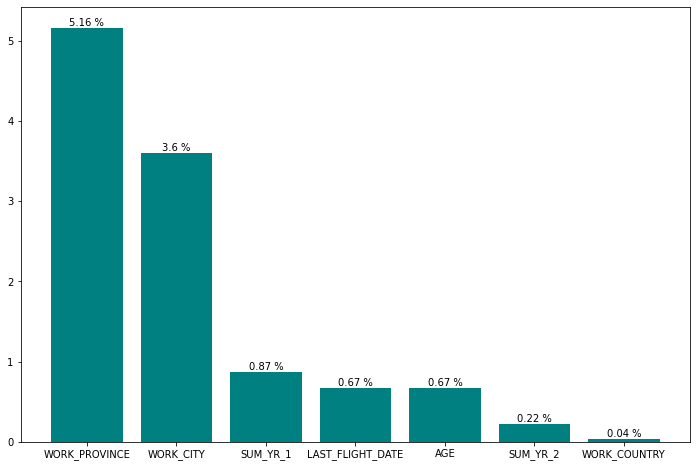

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
bars = plt.bar(x = data_null['feature'], height = data_null['percentage'], color = 'teal')

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

In [84]:
df.isna().sum()

FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

let's drop missing value.

In [85]:
df = df.dropna().reset_index(drop=True)
df.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

There are no more Missing Value.

## Duplicate Values

In [86]:
df.duplicated().sum()

1

There is 1 duplicate data, just drop it.

In [87]:
df = df.drop_duplicates()
df.duplicated().sum()

0

There isn't duplicate data.

## Feature Selection based on LRMFC Model

**LRFMC indicator**:

* L ( Length Relation ) = `LOAD_TIME` - `FFP_DATE`

The number of months since the member ’s membership time from the end of the observation window = end time of the observation window-time to join (unit: month).

* R ( Recency ) = `LAST_TO_END`

The number of months since the customer ’s most recent flight to the end of the observation window = the time from the last flight to the end of the observation window (Unit: month).

* F ( Frequency )  = `FLIGHT_COUNT`

The number of times the customer took the company aircraft in the observation window = the number of flights in the observation window (unit: times].

* M ( Monetary Value ) = `SEG_KM_SUM`

The accumulated mileage of the customer in the company during the observation period = the total number of flight kilometers in the observation window (unit: km).

* C ( Coefficient Value ) = `AVG_DISCOUNT`

The average value of the discount coefficients corresponding to the passengers who traveled during the observation period = average discount rate (unit: none).

In [88]:
df_LRFMC = df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].reset_index()

df_LRFMC['L'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30

df_LRFMC.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'}, inplace = True)

ColumnsTitles = ['L', 'R', 'F', 'M', 'C']
df_LRFMC = df_LRFMC.reindex(columns=ColumnsTitles)
df_LRFMC.head()

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,87.166667,11,135,283712,1.254676
2,68.233333,97,23,281336,1.090870
3,60.533333,5,152,309928,0.970658
4,74.700000,79,92,294585,0.967692


Data has been converted into LRMFC feature.

## Distribution & Outlier

In [89]:
feat_num = list(df_LRFMC)
feat_num

['L', 'R', 'F', 'M', 'C']

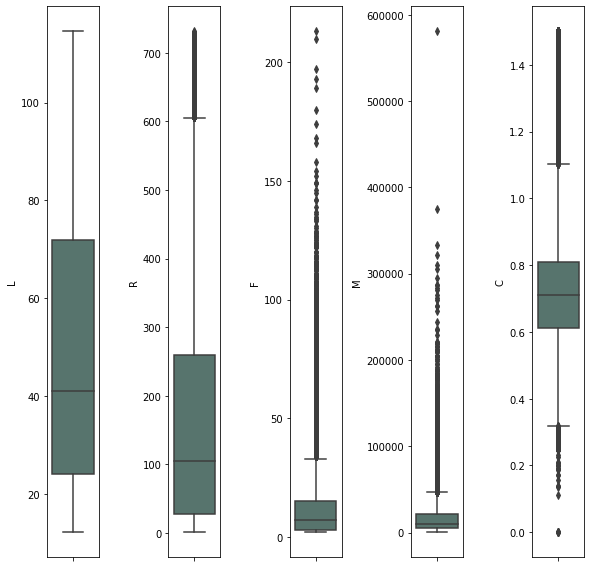

In [90]:
plt.figure(figsize = (10, 8))
for i in range(0, len(feat_num)):
  plt.subplot(1, 6, i+1)
  sns.boxplot(y = df_LRFMC[feat_num[i]], color = '#52796f', orient = 'v')
  plt.tight_layout()

`R`, `F` & `M` columns have outliers.

### Transformation Data to reduce outlier

In [91]:
outlier_column = ['R', 'F', 'M']
for column in outlier_column:
  df_LRFMC[column] = np.log10(df_LRFMC[column] + 1)

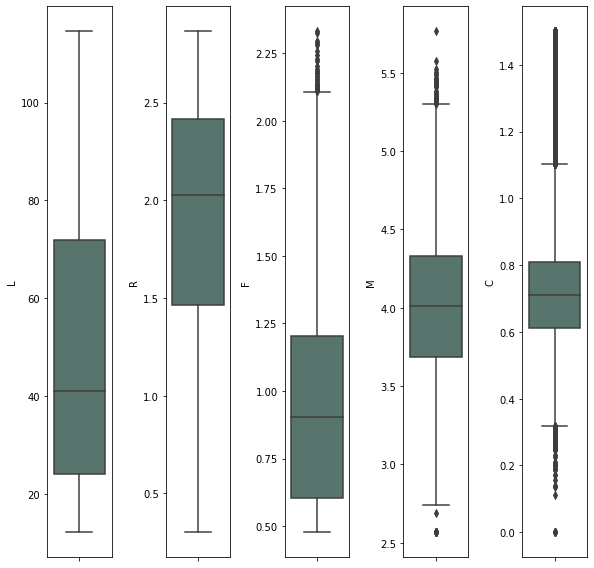

In [92]:
plt.figure(figsize = (10, 8))
for i in range(0, len(feat_num)):
  plt.subplot(1, 6, i+1)
  sns.boxplot(y = df_LRFMC[feat_num[i]], color = '#52796f', orient = 'v')
  plt.tight_layout()

### Remove outlier based on IQR

In [93]:
# Define IQR = Q3 - Q1
IQR = df_LRFMC.quantile(0.75) - df_LRFMC.quantile(0.25)

# Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_LRFMC.quantile(0.75) + 1.5 * IQR

# Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_LRFMC.quantile(0.25) - 1.5 * IQR

print(f'rows before IQR outlier filter: {len(df_LRFMC)}')

rows before IQR outlier filter: 57859


In [94]:
# Filter data between the limits
df_IQR_LRFMC = df_LRFMC[(df_LRFMC >= lower_limit) & (df_LRFMC <= upper_limit)]
    
# drop nan data
df_IQR_LRFMC = df_IQR_LRFMC.dropna().reset_index(drop=True)

print('rows after IQR outlier filter:', len(df_IQR_LRFMC))

rows after IQR outlier filter: 55445


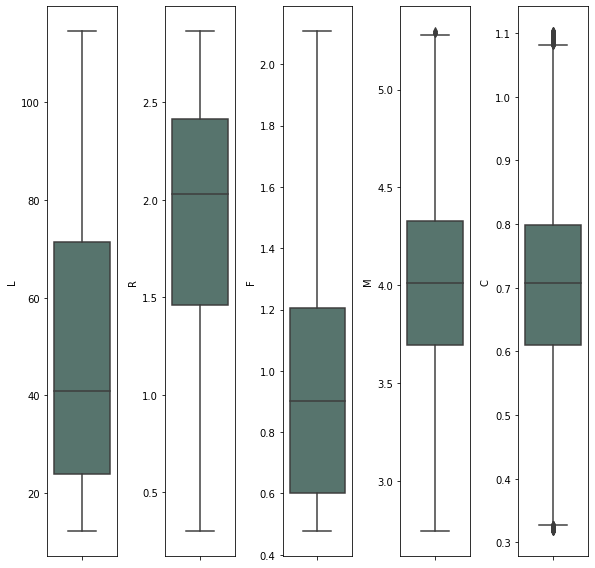

In [95]:
plt.figure(figsize = (10, 8))
for i in range(0, len(feat_num)):
  plt.subplot(1, 6, i+1)
  sns.boxplot(y = df_IQR_LRFMC[feat_num[i]], color = '#52796f', orient = 'v')
  plt.tight_layout()

Afterall the data have better distribution.

### Check duplicate data after transformation

In [96]:
df_IQR_LRFMC.duplicated().sum()

43

There is **43** duplicate data, just drop it.

In [97]:
df_IQR_LRFMC = df_IQR_LRFMC.drop_duplicates().reset_index(drop=True)
df_IQR_LRFMC.duplicated().sum()

0

There isn't duplicated data.

In [98]:
df_IQR_LRFMC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55402 entries, 0 to 55401
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       55402 non-null  float64
 1   R       55402 non-null  float64
 2   F       55402 non-null  float64
 3   M       55402 non-null  float64
 4   C       55402 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


**Observation**:

1. Now there is only **55402** rows & **5** columns data left.
2. All data type already float type (**numeric**).
3. Need to Scaling 

## Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
std = StandardScaler().fit_transform(df_IQR_LRFMC)

df_LRFMC_std = pd.DataFrame(data = std, columns = list(df_IQR_LRFMC))
df_LRFMC_std.head()

,L,R,F,M,C
0,2.244319,-0.572552,1.262283,2.905819,2.679589
1,-0.989378,-2.529205,3.071763,2.894036,2.182716
2,-0.075533,-1.672793,2.747803,2.889941,1.639074
3,-0.061198,-1.500990,1.523403,2.759751,2.470614
4,1.043778,0.065461,1.599295,2.866901,1.685239


the value of each column has been changed with **Standardize Scaler** (scaled).

# **Clustering K-Means**

In [101]:
from sklearn.cluster import KMeans

## Inertia

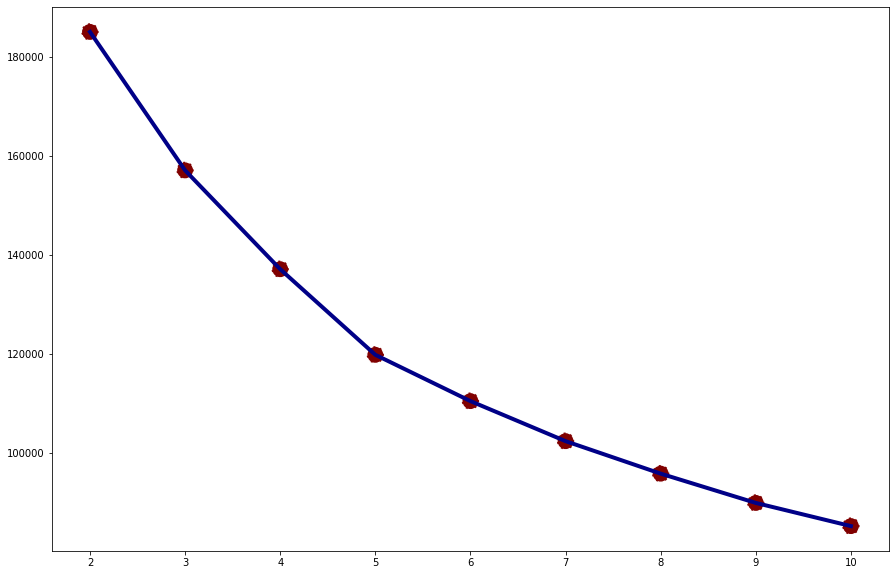

In [102]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_LRFMC_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

The value of each point in the **elbow method** has **almost the same** terms, from this graph the **best candidate** is point **N = 5**.
To make sure the N value, lets try again using **Silhouette Score method**.

## Silhouette Score

In [103]:
from sklearn.metrics import silhouette_score

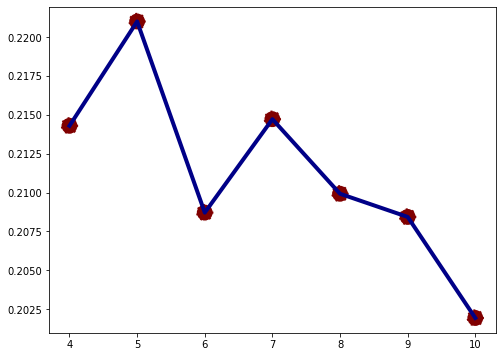

In [104]:
range_n_clusters = list(range(4,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_LRFMC_std)
    preds = kmeans.predict(df_LRFMC_std)
     
    score_euclidean = silhouette_score(df_LRFMC_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(4,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(4,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

From this graph, it can be concluded that the best N value is at the peak point (**N = 5**).

## K-Means Clustering Model (N = 5)

In [105]:
# Create clusters using K-Means
kmeans = KMeans(n_clusters=5, random_state=13).fit(df_LRFMC_std)

# Assign Cluster
cluster = kmeans.labels_
df_LRFMC_std['clusters'] = cluster
df_LRFMC_std.head()

,L,R,F,M,C,clusters
0,2.244319,-0.572552,1.262283,2.905819,2.679589,3
1,-0.989378,-2.529205,3.071763,2.894036,2.182716,3
2,-0.075533,-1.672793,2.747803,2.889941,1.639074,3
3,-0.061198,-1.500990,1.523403,2.759751,2.470614,3
4,1.043778,0.065461,1.599295,2.866901,1.685239,3


## Check Visualization using PCA & Scatter Plot

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(n_components=2)
pca.fit(df_LRFMC_std)
pcs = pca.transform(df_LRFMC_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pdf['clusters'] = cluster
pdf.head()

,pc1,pc2,clusters
0,-2.249575,2.346922,3
1,-3.304312,3.107345,3
2,-2.842785,3.028312,3
3,-2.317789,2.259444,3
4,-1.815909,2.231931,3


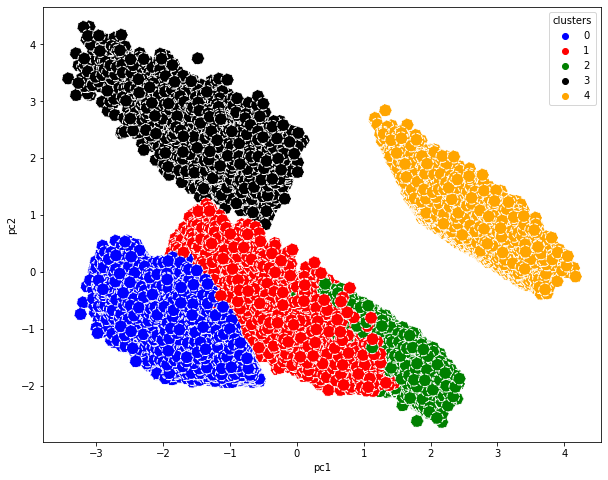

In [108]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x = "pc1",
                y = "pc2",
                hue = "clusters",
                linestyle = '--',
                data = pdf,
                palette = ['blue','red','green','black', 'orange'],
                s = 160,
                ax = ax)

## Visualization using Bar Plot

In [109]:
clusters_count = pdf.groupby(['clusters'],as_index=False).size()
clusters_count['percentage'] = round((clusters_count['size'] / len(pdf)) * 100, 2)

In [110]:
clusters_count

,clusters,size,percentage
0,0,14032,25.33
1,1,10177,18.37
2,2,11369,20.52
3,3,9169,16.55
4,4,10655,19.23


(0.0, 30.0)

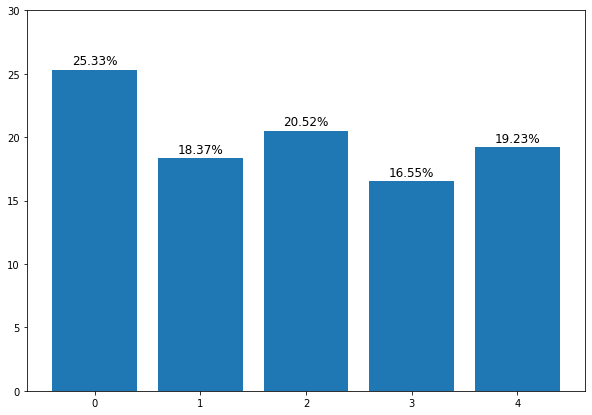

In [111]:
plt.figure(figsize=(10,7))
plt.bar(clusters_count['clusters'], clusters_count['percentage'])

number_bar = range(len(clusters_count['clusters']))
for i in number_bar:
  plt.text(x = clusters_count['clusters'][i], y = clusters_count['percentage'][i] + 0.4, s = str(clusters_count['percentage'][i]) + '%', size=12, ha='center')

plt.ylim(0,30)

## Analyze Using Radar Chart

In [112]:
import plotly.graph_objects as go

In [113]:
cluster_med = df_LRFMC_std.groupby('clusters').median().reset_index(drop=True)
cluster_med

,L,R,F,M,C
0,-0.713432,-0.288889,0.468493,0.500786,0.001651
1,1.227741,0.324482,-0.120857,-0.077818,0.013805
2,-0.668039,0.839155,-0.962257,-0.913354,0.809004
3,0.850258,-1.198945,1.483600,1.340939,0.213337
4,-0.648926,0.702523,-0.962257,-0.721381,-1.136983


In [114]:
fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=cluster_med.loc[i].values.tolist() + cluster_med.loc[i].values.tolist()[:1],
                                  theta=cluster_med.columns.tolist() + cluster_med.columns.tolist()[:1],
                                  name="CLUSTER-%s"%cluster_med.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])))

fig.show()

**Observation**:

**1. Cluster 0 (Customer Group 1)**

* Is a new user, because it has a low value on feature L, and can be assumed to be a new user.
* **New user but has a relatively large number of flights** so that it is high on F and M features.
* Feature C is quite high, it can be assumed that it is a user who occasionally makes flights because of the promo.

**2. Cluster 1 (Customer Group 2)**
* This users have LRMFC values that are almost in every feature.
* It can be assumed that **old users often fly and are promo hunters**, because they have a high C value.

**3. Cluster 2 (Customer Group 3)**
* Is a new user, because it has a low value on feature L, and can be assumed to be a new user.
* **New user and has very few flights** so very low against F and M features.
* But the value of C is quite high, meaning users who rarely fly but are very interested in the promo, this is what makes the C value very high.

**4. Cluster 3 (Customer Group 4)**
* Is an user who has been registered for a long time, because it has a high value on the L feature and can be assumed to be an old user.
* **Old users and have a large number of flights** so high on F and M features.
* It can be assumed that this user often makes flights and is a loyal customer who sometimes uses promos.

**5. Cluster 4 (Customer Group 5)**
* Is a new user, because it has a low value on feature L, and can be assumed to be a new user.
* **New user and rarely do flights** so low on F and M features.
* With a low C feature value, it can be assumed that this user is not interested in the promo.